In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data1 = pd.read_csv("realEstate1.csv")
data2 = pd.read_csv("realEstate2.csv")
data = data1.append(data2)

usefulColumns = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 
                 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

data = data[usefulColumns]
data = data[data["LstPrice"] > 200000]
data = data[data["LstPrice"] < 1000000]
data.TotSqf = data.TotSqf.map(lambda x: int(x.replace(",", '')))

data = data[data.Longitude < 0]
data = data[data.Taxes < 1000000]

propertyTypes = data["PropType"]
data = pd.get_dummies(data)

data.describe()


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,PropType_Condo,PropType_Single Family,PropType_Townhouse
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,0.130656,0.752896,1.270270,40.777522,-111.875806,463493.293436,0.830116,1.061776,450840.694981,4586.374517,3.223938,2.532819,2482.957529,1940.162162,0.216216,0.756757,0.027027
std,0.123357,1.242318,0.974642,0.005817,0.013933,196814.079526,3.385173,1.593363,187049.630334,20110.677828,1.221594,1.075576,1210.138045,36.389644,0.412460,0.429871,0.162476
min,0.000000,0.000000,0.000000,40.769424,-111.913645,205000.000000,0.000000,0.000000,205000.000000,1.000000,1.000000,0.000000,844.000000,1852.000000,0.000000,0.000000,0.000000
25%,0.050000,0.000000,0.000000,40.772402,-111.886690,311950.000000,0.000000,0.000000,308250.000000,1880.000000,2.000000,2.000000,1551.000000,1908.000000,0.000000,1.000000,0.000000
50%,0.110000,1.000000,1.000000,40.775774,-111.874094,414500.000000,1.000000,0.000000,400000.000000,2449.000000,3.000000,2.000000,2262.000000,1937.000000,0.000000,1.000000,0.000000
75%,0.160000,1.000000,2.000000,40.782083,-111.866080,589450.000000,1.000000,2.000000,562750.000000,3853.500000,4.000000,3.000000,3044.500000,1976.000000,0.000000,1.000000,0.000000
max,0.690000,16.000000,5.000000,40.791059,-111.843083,999900.000000,54.000000,8.000000,980000.000000,311262.000000,8.000000,7.000000,7508.000000,2015.000000,1.000000,1.000000,1.000000


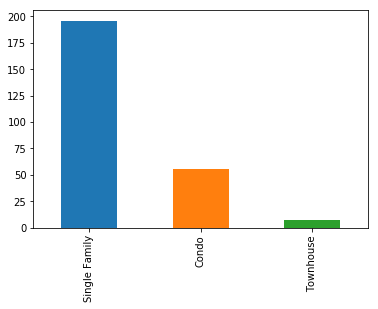

In [3]:
propertyTypes.value_counts().plot.bar()

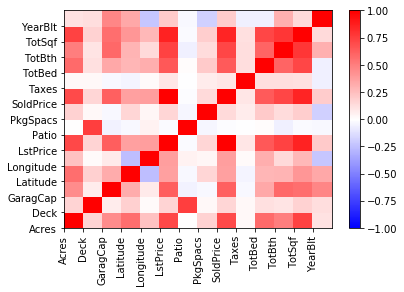

In [4]:
corr = data[data.columns[:-3]].corr()
heatmap = plt.pcolor(corr, vmin=-1, vmax=1, cmap=plt.cm.bwr)
plt.colorbar(heatmap)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);

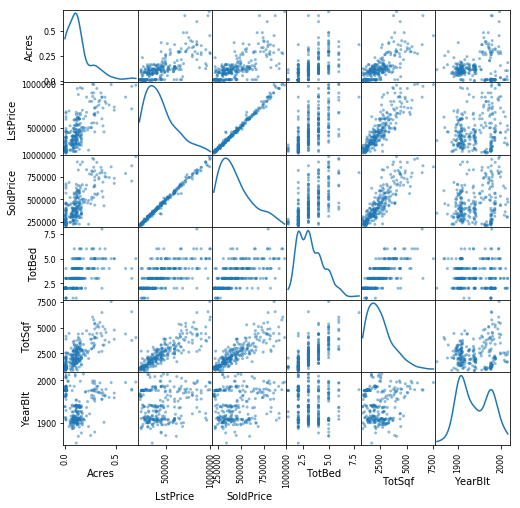

In [5]:
pd.plotting.scatter_matrix(data[ ['Acres', 'LstPrice', 'SoldPrice', 'TotBed',  'TotSqf', 'YearBlt']], 
                           figsize=(8,8), diagonal='kde')
plt.show()

In [5]:
data.plot.scatter(x="Latitude", y="Longitude", c="SoldPrice", cmap='bwr')

NameError: name 'data' is not defined

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
regression = smf.ols('SoldPrice ~ LstPrice', data=data).fit()
print(regression.summary())

sfReg = smf.ols('SoldPrice ~ TotSqf', data=data).fit()
print(sfReg.summary())

yearReg = smf.ols('SoldPrice ~ YearBlt', data=data).fit()
print(yearReg.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.535e+04
Date:                Tue, 29 May 2018   Prob (F-statistic):          7.94e-259
Time:                        10:49:41   Log-Likelihood:                -2915.1
No. Observations:                 259   AIC:                             5834.
Df Residuals:                     257   BIC:                             5841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.256e+04   2989.712      4.201      0.0

In [21]:
data.head()

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,PropType_Condo,PropType_Single Family,PropType_Townhouse
0,0.29,1,3,40.779524,-111.893542,725000,1,0,752000,7244,4.0,5.0,5415,1998,0,1,0
1,0.01,0,0,40.773243,-111.883291,205000,0,0,205000,1431,2.0,1.0,924,1965,1,0,0
2,0.11,0,0,40.773972,-111.867470,390000,1,0,390000,1816,3.0,1.0,1702,1940,0,1,0
3,0.14,0,1,40.783009,-111.872100,445000,1,3,443000,3260,3.0,2.0,1756,1940,0,1,0
5,0.01,0,2,40.771693,-111.886951,339000,0,2,334000,2141,3.0,2.0,1368,1976,1,0,0


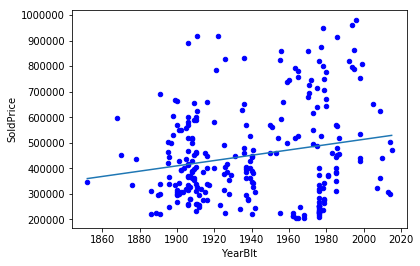

In [33]:
data.plot.scatter(x="YearBlt", y="SoldPrice",c = 'b')
xs = np.linspace(data.YearBlt.min(), data.YearBlt.max())
plt.plot(xs, yearReg.params['Intercept'] + yearReg.params['YearBlt']*xs)
plt.show()

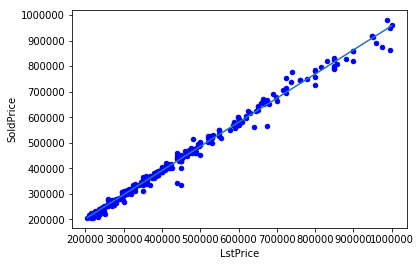

In [12]:
data.plot.scatter(x="LstPrice", y="SoldPrice",c = 'b')
xs = np.linspace(data.LstPrice.min(), data.LstPrice.max())
plt.plot(xs, regression.params['Intercept'] + regression.params['LstPrice']*xs)
plt.show()

In [9]:
multiReg = smf.ols('SoldPrice ~ Latitude +Longitude + LstPrice + Patio + PkgSpacs + ' +
                   'Taxes + TotBed + TotBth + TotSqf + YearBlt', data=data).fit()
multiReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2617.
Date:                Tue, 29 May 2018   Prob (F-statistic):          4.09e-245
Time:                        10:52:00   Log-Likelihood:                -2906.5
No. Observations:                 259   AIC:                             5835.
Df Residuals:                     248   BIC:                             5874.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.172e+07   1.23e+07     -0.957      0.340   -3.59e+07    1.24e+07
Latitude    5.136e+05   2.59e+05      1.982      0.049    3283.757    1.02e+06
Longitude   8.142e+04   1.06e+05      0.766      0.444   -1.28e+05    2.91e+05
LstPrice       0.9665      0.013     74.183      0.000       0.941       0.992
Patio        168.4268    341.742      0.493      0.623    -504.661     841.514
PkgSpacs   -2029.9075    768.992     -2.640      0.009   -3544.495    -515.321
Taxes         -0.0253      0.058     -0.433      0.665      -0.140       0.090
TotBed       625.0957   1458.399      0.429      0.669   -2247.331    3497.523
TotBth     -1147.8285   1949.210     -0.589      0.556   -4986.945    2691.288
TotSqf        -4.0800      2.361     -1.728      0.085      -8.731       0.571
YearBlt      -48.0559     39.399     -1.220      0.224    -125.654      29.543
==============================================================================
Omnibus:                       96.087   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.174
Skew:                          -1.334   Prob(JB):                    1.28e-130
Kurtosis:                       9.951   Cond. No.                     5.37e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
noListReg = smf.ols('SoldPrice ~ Latitude +Longitude + Patio + PkgSpacs + ' +
                   'Taxes + TotBed + TotBth + TotSqf + YearBlt', data=data).fit()
noListReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     99.41
Date:                Mon, 21 May 2018   Prob (F-statistic):           3.10e-77
Time:                        16:13:53   Log-Likelihood:                -3313.6
No. Observations:                 259   AIC:                             6647.
Df Residuals:                     249   BIC:                             6683.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.104e+08   5.71e+07      3.684      0.000    9.79e+07    3.23e+08
Latitude    3.318e+06   1.23e+06      2.694      0.008    8.92e+05    5.74e+06
Longitude   3.097e+06   4.72e+05      6.561      0.000    2.17e+06    4.03e+06
Patio        -37.4949   1642.336     -0.023      0.982   -3272.135    3197.146
PkgSpacs    -299.1996   3694.018     -0.081      0.936   -7574.705    6976.306
Taxes          0.0330      0.281      0.117      0.907      -0.520       0.586
TotBed      2862.2597   7007.465      0.408      0.683   -1.09e+04    1.67e+04
TotBth       2.48e+04   9215.668      2.691      0.008    6652.573     4.3e+04
TotSqf        94.4771      9.381     10.071      0.000      76.000     112.954
YearBlt      447.2629    186.608      2.397      0.017      79.732     814.794
==============================================================================
Omnibus:                       30.462   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.493
Skew:                           0.645   Prob(JB):                     8.91e-13
Kurtosis:                       4.865   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""